# **Diabetes Prediction**




**Objective: To develop a machine learning model to accurately predict whether or not the patients is diagnosed with diabetes or not.**



**Dataset Description:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements 
included in the dataset. Several constraints were placed on the selection of these instances from a larger database.
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



#**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#**Reading the Dataset**

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/NetzwerkPriyanka8/ML_April/main/Final_Project/diabetes.csv")

In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(768, 9)

In [ ]:
# First 5 rows of the Dataset.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Last 5 rows of the Dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#**Using describe method to show the content**

In [ ]:
# Statistical measures of the dataset.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#**Checking for missing values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

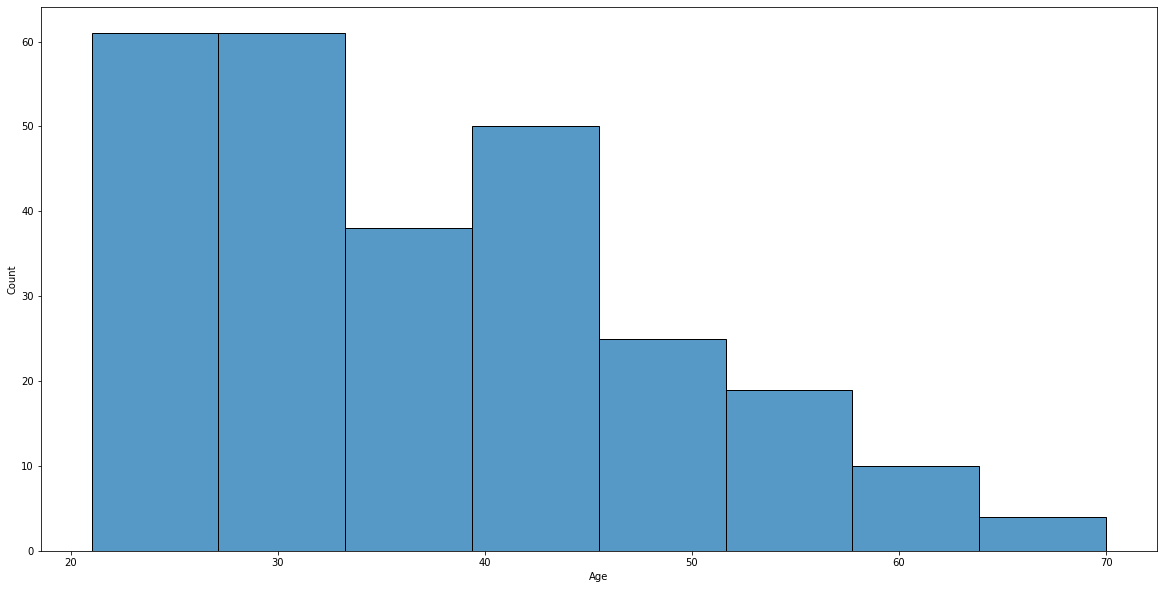

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['Outcome']==1]['Age'], bins=8)

So, from above plots it seems patients are mostly of age between 20 to 45 yrs

Lets see some other plots



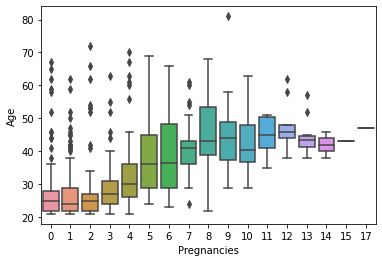

In [ ]:
sns.boxplot(x='Pregnancies', y='Age',data=df)

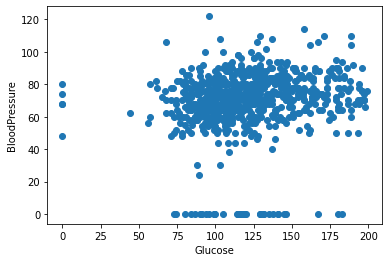

In [ ]:
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

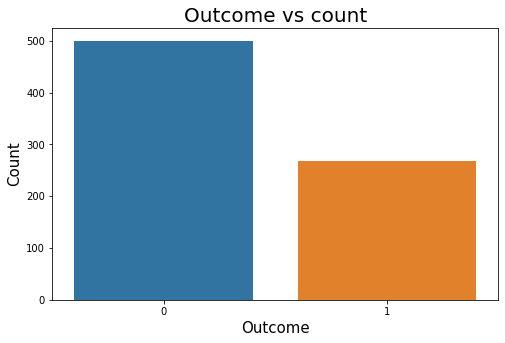

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Outcome'])
plt.title('Outcome vs count',fontsize=20)
plt.xlabel('Outcome',fontsize=15)
plt.ylabel('Count',fontsize=15);

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#**Initiating the variables**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#**Splitting the data set in to training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Feature Scaling to scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

#**Training the model**

**1.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classfr = LogisticRegression()
classfr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Testing the model

In [ ]:
y_pred = classfr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_pred = classfr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#Checking the performance

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

#We are getting 75% accuracy here...

[[79 20]
 [18 37]]


75.32467532467533

**2.Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Testing our model
y_pred = classifier.predict(X_test)

In [ ]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[79 20]
 [27 28]]


69.48051948051948

**3.KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Testing our model
y_pred = classifier.predict(X_test)

In [ ]:
#making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[79 20]
 [27 28]]


69.48051948051948

**4.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Accuracy on test data
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
accuracy_score(X_test_prediction,y_test)*100

75.32467532467533

#**Final Accuracy Percentage**

**1.Logistic Regression = 75.32**

**2.Decision Tree Classifier =69.48**

**3.KNN =69.48**

**4.Random Forest =75.32**

#**Prediction by taking input from User for new values**

In [ ]:
print("Please enter the corresponding details :")
Pregnancies = int(input("Pregnancies :"))
Glucose = float(input("Glucose :"))
BloodPressure = float(input("BloodPressure :"))
SkinThickness = float(input("SkinThickness :"))
Insulin = float(input("Insulin :"))
BMI = float(input("BMI :"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction :"))
Age = float(input("Age :"))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


output = classfr.predict([[Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age	]])
print("Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative")
print("The predicion of Diabates diagnosis acc. to data is {} on the basis of Pregnancies {} , 	Glucose {} , BloodPressure {},	SkinThickness {},	Insulin {},	BMI {},	DiabetesPedigreeFunction {} and Age {} ".format(output[0] if output else "No data",Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age)) 

Please enter the corresponding details :
Pregnancies :2
Glucose :100
BloodPressure :75
SkinThickness :20
Insulin :110
BMI :25
DiabetesPedigreeFunction :0.25
Age :35
Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative
The predicion of Diabates diagnosis acc. to data is 1 on the basis of Pregnancies 2 , 	Glucose 100.0 , BloodPressure 75.0,	SkinThickness 20.0,	Insulin 110.0,	BMI 25.0,	DiabetesPedigreeFunction 0.25 and Age 35.0 


In [ ]:
print("Please enter the corresponding details :")
Pregnancies = int(input("Pregnancies :"))
Glucose = float(input("Glucose :"))
BloodPressure = float(input("BloodPressure :"))
SkinThickness = float(input("SkinThickness :"))
Insulin = float(input("Insulin :"))
BMI = float(input("BMI :"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction :"))
Age = float(input("Age :"))


output = classfr.predict([[Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age	]])
print("Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative")
print("The predicion of Diabates diagnosis acc. to data is {} on the basis of Pregnancies {} , 	Glucose {} , BloodPressure {},	SkinThickness {},	Insulin {},	BMI {},	DiabetesPedigreeFunction {} and Age {} ".format(output[0] if output else "No data",Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age))


Please enter the corresponding details :
Pregnancies :3
Glucose :140
BloodPressure :80
SkinThickness :120
Insulin :55.2
BMI :0.12
DiabetesPedigreeFunction :4
Age :34
Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative
The predicion of Diabates diagnosis acc. to data is 1 on the basis of Pregnancies 3 , 	Glucose 140.0 , BloodPressure 80.0,	SkinThickness 120.0,	Insulin 55.2,	BMI 0.12,	DiabetesPedigreeFunction 4.0 and Age 34.0 
